# Métodos Numéricos (2023)

## Guía 6: Ecuaciones Diferenciales Ordinarias

In [2]:
using Plots
using LaTeXStrings

## Problema 1

Escriba funciones que permitan realizar un paso de integración de la ecuación,

$$
\frac{dy}{dt} = f(t,y,p),\;\;\;\;\;\; a\leq t \leq b,\;\;\;\;\; y(a) = \alpha
$$

de una función arbitraria $f(t,y,p)$ de acuerdo a los métodos de Euler, y Runge Kutta de 2° orden (RK2) y Runge Kutta de 4° orden (RK4). 
Las funciones deben admitir como variables: $f(t,y,p)$, $y_0$ (el valor inicial), $t_0$ y $h$ (el paso de integración), el campo $p$ es para permitir parámetros en la función. 
Cada función debe retornar el valor de la variable luego del paso de integración, es decir la aproximación a $y(t + h)$.

Utilizando estas funciones escriba otra función que permita hacer, tomando como variable cualquiera de los métodos, la integración de una función genérica en un intervalo $[a,b]$ arbitrario. Esta función deberá admitir como variables, además de las anteriores, la función de un paso de cada método, y el intervalo de integración.
La función debe retornar dos vectores, uno con los valores $t_i = t_0 + i h$ y otro con los valores aproximados de $w_i \approx y(t_i)$.

**Ayuda:** Dejamos como ejemplo la implementación del método de Euler.

In [2]:
"""
    Euler(f,y0,t0,h)

Hace un paso del método de Euler explícito: 
    f  : función que nos da la tangente como en (y,t,p)
    y0 : y inicial
    t0 : t inicial
    h  : dt

# Examples
```julia-repl
julia> 
function f(y,t)
    return -y + sin(2π*t)
end
h= 0.1
Euler(f,1,0,h)
0.9
```
"""
function Euler(f,y0,t0,h)
    return y0 + h*f(y0,t0)
end

"""
    Euler(f,y0,t0,h,p)

Hace un paso del método de Euler explícito: 
    f  : función que nos da la tangente como en (y,t,p)
    y0 : y inicial
    t0 : t inicial
    h  : dt
    p  : parametros opcionales.

# Examples
```julia-repl
julia> 
function f(y,t,p)
    return -p[1]*y + sin(2π*t) + p[2]
end
h= 0.1
Euler(f,1,0,h,[1,2])
1.1
```
"""
function Euler(f,y0,t0,h,p)
    return y0 + h*f(y0,t0,p)
end

Euler

In [3]:
function euler_step(f, y0, t0, h; p=nothing)
    if p != nothing
        return y0 + h * f(y0, t0, p)
    else
        return y0 + h * f(y0, t0)
    end
end

euler_step (generic function with 1 method)

In [4]:
function rk2_step(f, y0, t0, h; p= nothing)
    if p != nothing
        k1 = h * f(y0, t0, p)
        k2 = h * f(y0 + k1, t0 + h, p)
        y1 = y0 + 0.5 * (k1 + k2)
        return y1
    else
        k1 = h * f(y0, t0)
        k2 = h * f(y0 + k1, t0 + h)
        y1 = y0 + 0.5 * (k1 + k2)
        return y1
    end
end

rk2_step (generic function with 1 method)

In [5]:
function rk4_step(f, y0, t0, h; p = nothing)
    if p != nothing
        k1 = h * f(y0, t0, p)
        k2 = h * f(y0 + 0.5 * k1, t0 + 0.5 * h, p)
        k3 = h * f(y0 + 0.5 * k2, t0 + 0.5 * h,  p)
        k4 = h * f(y0 + k3, t0 + h, p)
        y1 = y0 + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        return y1
    else
        k1 = h * f(y0, t0)
        k2 = h * f(y0 + 0.5 * k1, t0 + 0.5 * h)
        k3 = h * f(y0 + 0.5 * k2, t0 + 0.5 * h)
        k4 = h * f(y0 + k3, t0 + h)
        y1 = y0 + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        return y1
    end
end

rk4_step (generic function with 1 method)

In [6]:
function f(y,t)
    return -y + sin(2π*t)
end
h= 0.01
rk2_step(f,1,0,h)

0.9903639525976465

In [7]:
# Test
f(y,t,p) = -p[1]*y + sin(2π*t) + p[2]
h = 0.1
rk2_step(f,1,0,h,p=[1,2])

1.1243892626146237

In [7]:
function solveODE(f, method, y0, t0, h, a, b; p = nothing)
    
    num_steps = Int(round((b-a)/h))  # Número de pasos de integración
    t_values = [t0 + i * h for i in 0:num_steps]  # Vector de tiempo t
    w_values = zeros(num_steps+1)  # Vector de valores aproximados w
    w_values[1] = y0
    
    # Selección del método de integración
    if method == "euler"
        step_func = euler_step
    elseif method == "rk2"
        step_func = rk2_step
    elseif method == "rk4"
        step_func = rk4_step
    else
        println("Método de integración inválido")
        return nothing
    end

    # Iteración para realizar los pasos de integración
    for i in 1:num_steps
        t_i = t_values[i]
        w_i = w_values[i]
        w_iplus1 = step_func(f, w_i, t_i, h; p)
        w_values[i+1] = w_iplus1
    end
    
    return t_values, w_values
end

solveODE (generic function with 1 method)

In [9]:
h = 0.1
solucion = solveODE(f,"euler",1.,0.,h,0.,10., p=[1,2])
solucion2 = solveODE(f,"rk2",1.,0.,h,0.,10., p=[1,2])
solucion3 = solveODE(f,"rk4",1.,0.,h,0.,10., p=[1,2])

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 9.8, 9.9, 10.0], [1.0, 1.1245557485981525, 1.2838846269539048, 1.445640704464957, 1.5738376425764304, 1.642852457424889, 1.6474462618470405, 1.6049767421722974, 1.5489593946217728, 1.5164388245809586  …  1.8888400925959814, 1.9754377620660404, 2.071383914356984, 2.1400335642571067, 2.1551677597086276, 2.1110083591772026, 2.0244251114152774, 1.928492008426668, 1.8598541660246455, 1.8447306544401871])

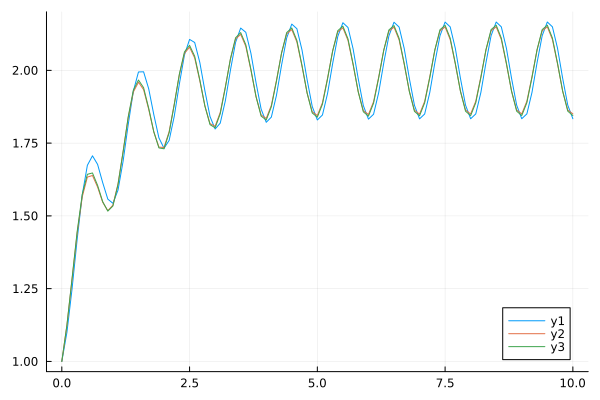

In [10]:
plot(solucion[1],solucion[2])
plot!(solucion2[1],solucion2[2])
plot!(solucion3[1],solucion3[2])

## Problema 2

Utilizando las funciones del **Problema 1** resuelva con los tres métodos dados en el teórico (Euler, RK2 y RK4) el siguiente problema de valores iniciales:
$$
\frac{dy}{dt} = -y+\sin(2\pi t), \;\;\;\;\;\; 0 \le t \le 1\; , 
\;\;\;\;\; y(0) = 1.0
$$
en el intervalo $0 \le t \le 1$ con un paso de integración $h=0.1$. 

Grafique tanto la aproximación obtenida y compare con la solución exacta: 

$$
y_e(t)=\Bigl(1+\frac{2\pi}{1+4\pi^2}\Bigr)e^{-t}+\frac{\sin(2\pi t)-2\pi
    \cos(2\pi t)}{1+4\pi^2},
$$

Grafique el error global, $\epsilon(t) = |w(t)-y_e(t)|$

In [11]:
prob2(y,t) = -y+sin(2*π*t)
y0, t0, h = 1., 0., 0.1
a, b = 0.,1.

(0.0, 1.0)

In [12]:
ye(t) = (1+2*π/(1+4*π^2))*exp(-t)+(sin(2*π*t)- 2*π*cos(2*π*t))/(1+4*π^2)

ye (generic function with 1 method)

In [13]:
sol_euler = solveODE(prob2,"euler", y0, t0, h, a, b)
sol_rk2 = solveODE(prob2,"rk2", y0, t0, h, a, b)
sol_rk4 = solveODE(prob2,"rk4", y0, t0, h, a, b)

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], [1.0, 0.9342307485981525, 0.9213464297664048, 0.9272775484673125, 0.9144782204114117, 0.8559143262716489, 0.7450701305996705, 0.5981479795147553, 0.4476179740906292, 0.3295788069811099, 0.26975512425163184])

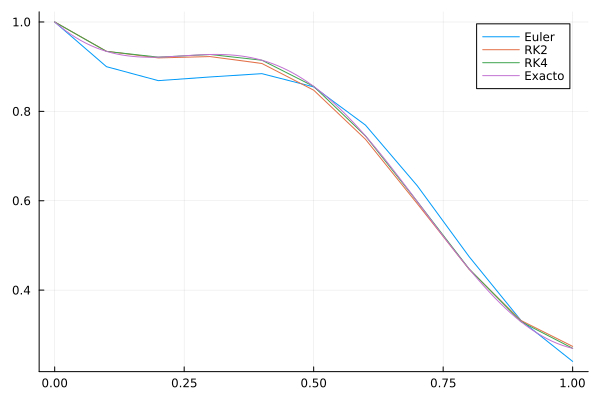

In [14]:
plot(sol_euler[1],sol_euler[2], label="Euler")
plot!(sol_rk2[1],sol_rk2[2], label="RK2")
plot!(sol_rk4[1],sol_rk4[2], label="RK4")
plot!(0.:0.01:1.,ye.(0.:0.01:1.), label="Exacto")

## Problema 3
Considere el problema de valor inicial:
$$
\frac{dy}{dt} = \sin{(y)},\;\;\;\;\;\; 0\le t\le 20.0, \;\;\;\;\; y(0)=\alpha
$$
Resuélvalo para los siguientes valores iniciales $\alpha_1=0.5$, $\alpha_2=2.0$, $\alpha_3= \pi$, $\alpha_4=3.6$ $\alpha_5=5.5$ y $\alpha_6=2\pi$, en todos los casos con $h=0.1$.
Para cada valor inicial genere un archivo de salida como el indicado en el problema 1 (solo para RK4). 
Luego grafique simultáneamente las seis curvas aproximadas a las soluciones de los seis problemas de valores iniciales (no olvide hacer un gráfico de calidad, completo). 
Analice.

In [15]:
prob3(y,t) = sin(y)
alpha = [0.5,2.,π,3.6,5.5, 2*π]
t0, h = 0., 0.001
a, b = 0.,20.

(0.0, 20.0)

In [16]:
sols = [solveODE(prob3,"rk2",alpha[j],t0,h,a,b) for j in 1:6]

6-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001  …  19.991, 19.992, 19.993000000000002, 19.994, 19.995, 19.996, 19.997, 19.998, 19.999, 20.0], [0.5, 0.5004796358787935, 0.5009596927519129, 0.5014401708781521, 0.5019210705161434, 0.5024023919243563, 0.5028841353610963, 0.5033663010845036, 0.5038488893525525, 0.5043319004230494  …  3.141592637299525, 3.141592637315807, 3.1415926373320726, 3.1415926373483223, 3.1415926373645555, 3.1415926373807728, 3.1415926373969736, 3.1415926374131584, 3.141592637429327, 3.1415926374454792])
 ([0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001  …  19.991, 19.992, 19.993000000000002, 19.994, 19.995, 19.996, 19.997, 19.998, 19.999, 20.0], [2.0, 2.0009091080382713, 2.001817837081835, 2.0027261865385837, 2.003634155817911, 2.0045417443307114, 2.0054489514893814, 2.0063557767078195, 2.0072622194014285, 2.0081682789871143  …  3.14159

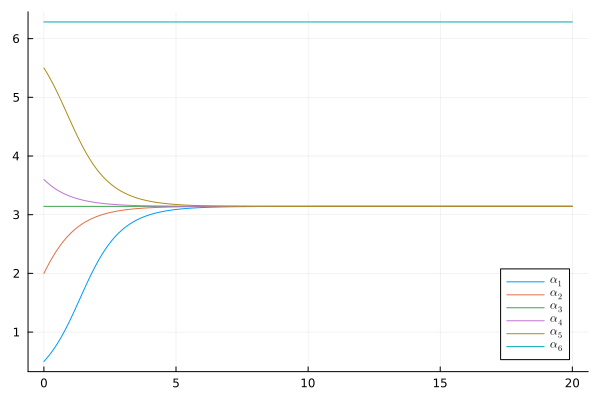

In [17]:
plot(sols[1][1],sols[1][2],label=L"α_1")
plot!(sols[2][1],sols[2][2],label=L"α_2")
plot!(sols[3][1],sols[3][2],label=L"α_3")
plot!(sols[4][1],sols[4][2],label=L"α_4")
plot!(sols[5][1],sols[5][2],label=L"α_5")
plot!(sols[6][1],sols[6][2],label=L"α_6")

## Problema 4

Siendo $g$ la acelaración de la gravedad, considere el problema de valores iniciales para la ecuación de la dinámica de un péndulo simple de longitud $l$
\begin{eqnarray}
\ddot{\theta}(t) &=& - \frac{g}{l} \sin{(\theta(t))}  \hspace{5cm} (1)
\end{eqnarray}
para $\theta(0)=\theta_0$, $\dot{\theta}(0)= \dot{\theta}_0$.
Definiendo  $u= \dot{\theta}$ esta ecuación de segundo orden se puede escribir como un sistema de dos ecuaciones de primer orden
\begin{eqnarray}
\dot{\theta}(t) &=& u(t) \hspace{5cm} (2)\\
\dot{u}(t)      &=& - \frac{g}{l} \sin{(\theta(t))}
\end{eqnarray}
de condiciones iniciales $(\theta(0),u(0))=(\theta_0,\dot{\theta}_0)$.

Analice numéricamente este sistema de ecuaciones diferenciales ordinarias acopladas para $g=10 m/s^2$ y $l=1 m$. Para ello:

1. Implemente el método RK4 multidimensional.

2. Usando el método anteriormente implementado y paso de integración $h=0.01$, calcule una solución numérica $\theta(t)$ y $u(t)$ vs $t$ del sistema (2) para $0\le t\le 10$ y condiciones iniciales $\theta(0)=0.25$ y $u(0)=0$.

Note que $\sin(\theta) \approx \theta$ para ángulos pequeños. Luego, cuando $0<\theta_0\ll 1$, la ecución diferencial ordinaria (1) puede aproximarse por la del oscilador armónico
\begin{eqnarray}
\ddot{\theta}(t) &=& - \frac{g}{l} \theta(t))  \hspace{5cm} (3)
\end{eqnarray}
la cual admite solución exacta $\theta_e(t) = \theta_0 \cos(\omega t)$ con $\omega=\sqrt{\frac{g}{l}}$.

3. Calcule una solución numérica aproximada $\theta_a(t)$ y $u_a(t)$ vs $t$ de oscilador armónico usando las mismas condiciones iniciales que para el sistema (2).

4. Calcule y grafique la diferencia $\theta_e(t)-\theta_a(t)$ vs $t$ para visualizar el error de la solución numérica del oscilador armónico. Que observa?

5. Compare todas las soluciones graficando simultaneamente $\theta(t)$, $u(t)$, $\theta_a(t)$, $u_a(t)$, $\theta_e(t)$ y $u_e(t)$ vs $t$.
    
6. Calcule y grafique simultaneamente la energía del sistema $E(t) = K(t) + U(t)$ utilizando:

    a). La energía del sistema original con la solución numérica del sistema original.
    
    b). La energía del sistema original con la solución numérica del oscilador armónico.
    
    c). La energía del oscilador armónico con la solución numérica del oscilador armónico.
    
    d). La energía del oscilador armónico con la solución exacta del oscilador armónico.

    Discuta lo observado.

**Ayuda:** Note que $y,f(t,y)\in \mathbb{R}^2$ donde $y=(y_1,y_2)=(\theta,u)$ y $f(t,y)=(f_1(t,y),f_2(t,y))$ con $f_1(t,y)=y_2$ y $f_2(t,y)=-\frac{g}{l}\sin(y_1)$.

In [8]:
function rk4_multi(f, y0, t0, h, a, b; p = nothing)
    
    n_eqs = length(y0)
    
    n_steps = Int(round((b-a)/h))  # Número de pasos de integración
    
    t = [t0 + i*h for i in 0:n_steps]  # Vector de tiempo t
    w = zeros(n_eqs,n_steps+1)  # Vector de valores aproximados w
    w[:,1] = y0

    k1 = zeros(n_eqs)
    k2 = zeros(n_eqs)
    k3 = zeros(n_eqs)
    k4 = zeros(n_eqs)
    
    # Iteración para realizar los pasos de integración
    for i in 1:n_steps
        for j in 1:n_eqs
            k1[j] = h*f(w[:,i], t[i]; p)[j]
        end
        
        for j in 1:n_eqs
            k2[j] = h*f(w[:,i] .+ 0.5*k1, t[i] + 0.5*h; p)[j]
        end
        
        for j in 1:n_eqs
            k3[j] = h*f(w[:,i] .+ 0.5*k2, t[i] + 0.5*h; p)[j]
        end
        
        for j in 1:n_eqs
            k4[j] = h*f(w[:,i] .+ k3, t[i] + h; p)[j]
        end
        
        for j in 1:n_eqs
            w[j,i+1] = w[j,i] + (k1[j]+2*k2[j]+2*k3[j]+k4[j])/6
        end
    end
 
    return t, w
end

rk4_multi (generic function with 1 method)

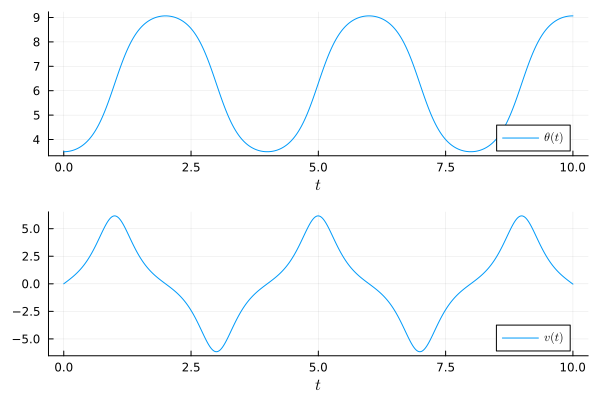

In [9]:
g, l = 9.8, 1.
t0 = 0.
y0 = [3.5,0.]
h = 0.01
a,b = 0., 10.
function f(y,t;p=[1.,1.])
    y1, y2 = y
    f1(y,t) = y2
    f2(y,t) = -p[1]/p[2] * sin(y1)
    return f1(y,t),f2(y,t)
end

sol4 = rk4_multi(f, y0, t0, h, a, b, p=[9.8,1.])

theta = sol4[2][1,:]
v = sol4[2][2,:]
t = sol4[1]

p1 = plot(t,theta,label=L"θ(t)")
p2 = plot(t,v,label=L"v(t)")
plot(p1,p2,layout=(2,1),xlabel=L"t")

## Problema 5

Considere el problema de estudiar la evolución de una epidemia, con el modelo **SIR**.
Sea $S=$ población de individuos susceptibles, $I=$ población de individuos infectados y $R=$ población de individuos recuperados (que tienen inmunidad y no pueden volver a contagiarse).
Entonces las ecuaciones diferenciales asociadas a la evolución temporal de dichas poblaciones son:

\begin{align}
\frac{d S}{d t} &= -\beta S I /N\\
\frac{d I}{d t} &= \beta S I /N - \gamma I\\
\frac{d R}{d t} &= \gamma I
\end{align}

donde $N=S+I+R$ es la población total constante.

1. Considere las condiciones iniciales: $N=1000$, $I_0=10$, $R_0=0$ y los parámetros $\gamma = 0.1$ y  $\beta = 0.5$.
 
2. Utilice el método RK4 implementado en el **problema 4** para resolver este problema entre $t=0$ y $t=200$. 
 
3. Grafique la evolución temporal de las tres poblaciones, $S(t)$, $I(t)$ y $R(t)$ vs $t$ en el intervalo de $t$ calculado.

In [10]:
function prob5(y,t;p=nothing)
    S, I, R = y
    N = S + I + R
    β,γ = p[1], p[2]
    
    f1(y,t,p) = -β*S*I/N
    f2(y,t,p) = β*S*I/N - γ*I
    f3(y,t,p) = γ*I
    
    return f1(y,t,p), f2(y,t,p), f3(y,t,p)
end

prob5 (generic function with 1 method)

In [11]:
y0 = [990,10,0]
t0 = 0.
h = 0.01
p = [0.1,0.5]
a,b = 0., 200.
sol5 = rk4_multi(prob5,y0,t0,h,a,b,p=p)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  199.91, 199.92000000000002, 199.93, 199.94, 199.95000000000002, 199.96, 199.97, 199.98000000000002, 199.99, 200.0], [990.0 989.9901198723126 … 987.5350048527837 987.5350048527837; 10.0 9.959980243903164 … 1.4131268353254623e-34 1.4074680737485106e-34; 0.0 0.04989988378432803 … 12.464995147224538 12.464995147224538])

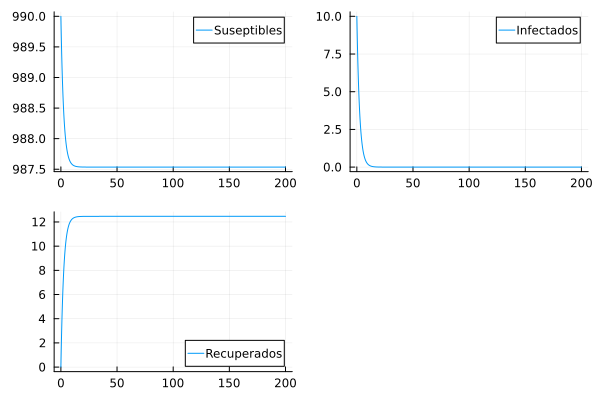

In [12]:
t = sol5[1]
S = sol5[2][1,:]
I = sol5[2][2,:]
R = sol5[2][3,:]

p1 = plot(t,S, label="Suseptibles")
p2 = plot(t,I, label="Infectados")
p3 = plot(t,R, label="Recuperados")

plot(p1,p2,p3)

# Problemas Complementarios

## Problema C.1

La llamada **ecuación logística**
$$
\frac{dN}{dt}= r\,N \left(1-\frac{N}{K}\right)
$$
describe el crecimiento autolimitado de una población dada (suponiendo que no
interactúa con otras especies y que tiene fuentes limitadas de alimentos). Fue
propuesta por Verhulst en 1838 y permite describir al menos cualitativamente
varios fenómenos poblacionales observados en la naturaleza. En esta ecuación
$N(t)$ es el número de individuos de la colonia al tiempo $t$ y $K$ es una
constante positiva.

Una solución $N^*$ se dice estacionaria si se satisface que $dN^*/dt=0$, y por
ende no cambia en el tiempo. Para esta ecuación es fácil verificar que
sólo existen dos soluciones estacionarias: $N_1^*=0$ y $N_2^*=K$.

Determine cuál de las dos soluciones estacionarias es estable y cuál inestable
resolviendo numéricamente la ecuación diferencial con el método
Runge-Kutta de cuarto orden para $r=2$, $K=100$, en el intervalo $0\le t \le 50$
con $h=0.1$ y considerando cinco condiciones iniciales diferentes: a) $N(0)= 0$,
b) $N(0)=2$, c) $N(0)=50$, d) $N(0)= 120$ y d) $N(0)=200$.  Grafique
simultáneamente las cinco soluciones $t$ vs.  $N(t)$ en el intevalo $0\le t\le
50$ en un gráfico completo.

In [23]:
function probC1(y,t,p)
    return p[1]*y*(1-y/p[2])
end

probC1 (generic function with 1 method)

In [24]:
y0 = [0,2,50,120,200]
t0 = 0.
h = 0.01
p = [2,100]
a,b = 0., 50.
solC1 = [solveODE(probC1,"rk4",y0[j],t0,h,a,b,p=p) for j in 1:5]

5-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  49.910000000000004, 49.92, 49.93, 49.94, 49.95, 49.96, 49.97, 49.980000000000004, 49.99, 50.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
 ([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  49.910000000000004, 49.92, 49.93, 49.94, 49.95, 49.96, 49.97, 49.980000000000004, 49.99, 50.0], [2.0, 2.039578635575579, 2.079923882210393, 2.1210499248951447, 2.1629711846010116, 2.2057023211339524, 2.249258235977473, 2.2936540751213035, 2.338905231873324, 2.3850273496519487  …  99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964, 99.99999999999964])
 ([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  49.910000000000004, 49.92, 49.93, 49.94, 49.95, 49.96, 49.97, 49.98000000

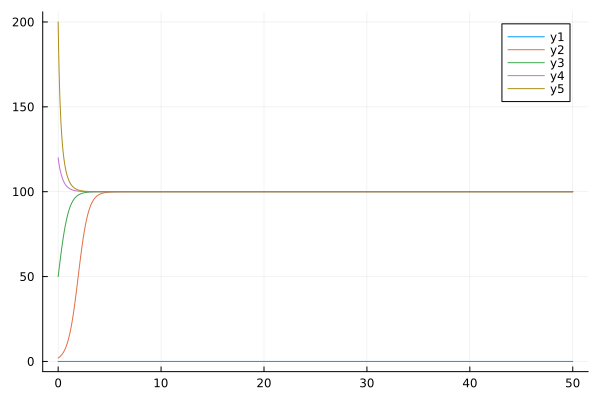

In [25]:
t1, N1 = solC1[1]
t2, N2 = solC1[2]
t3, N3 = solC1[3]
t4, N4 = solC1[4]
t5, N5 = solC1[5]

plot(t1,N1)
plot!(t2,N2)
plot!(t3,N3)
plot!(t4,N4)
plot!(t5,N5)

## Problema C.2
Use el método del disparo para resolver los siguientes problemas de 
frontera con una tolerancia de $10^{-5}$. Se da un valor tentativo inicial de $h$ 
y la solución exacta  para comparación.
 
1. $1\leq t\leq 2$, comience con $h=0.5$
$$
\ddot{x}\,=\,-(\dot{x})^2 \,,\;\;\;x(1)=0\;,\;\;x(2)=\ln{(2)} \,.
$$
Solución exacta $x=\ln{(t})$.

2. $-1\leq t\leq 0$, comience con $h=0.25$
$$
\ddot{x}\,=\,2 x^3\,,\;\;\;x(-1)=\frac{1}{2}\;,\;\;x(0)=\frac{1}{3} \,.
$$
Solución exacta $x=1/(t+3)$.

3. $1\leq t\leq 2$, comience con $h=0.05$
$$
\ddot{x}\,=\,\frac{(t\,\dot{x} )^2\,-9 x^2+4 t^6}{t^5},\;\;\;x(1)=0\;,\;\;x(2)=\ln{(256)} \,.
$$
Solución exacta $x=t^3\,\ln{(t})$.

**Ayuda:** Considere las aproximaciones $x_a(t)$ con $x_a(t_0) = x_0$ y $\dot{x}_a(t_0) = a$. Utilice el método de la bisección para encontrar la raíz de $F(a) := x_a(t_1) - x_1$.

### Rta. C.2.2

**Teoría**

Primero convertimos el problema de valor inicial de segundo orden a uno de primer orden. Sea $y_1=x$ y $y_2=x'$. Luego, $y_1'=x'=y_2$, $y_2'=x''=2x^3=2y_1^3$, $y_1(t_0)=x(t_0)=x_0$ y $y_2(t_0)=x'(t_0)=a$. Escribimos la solucion $x_a$ como $y_{a,1}$ y $F(a)=y_{a,1}(t_1)-x_1$.

### Rta. C.2.3

**Teoría**

Primero convertimos el problema de valor inicial de segundo orden a uno de primer orden. Sea $y_1=x$ y $y_2=x'$. Luego, $y_1'=x'=y_2$, $y_2'=x''=((tx')^2-9x^2+4t^6)/t^5=((ty_2)^2-9y_1^2+4t^6)/t^5$, $y_1(t_0)=x(t_0)=x_0$ y $y_2(t_0)=x'(t_0)=a$. Escribimos la solucion $x_a$ como $y_{a,1}$ y $F(a)=y_{a,1}(t_1)-x_1$.

## Problema C.3
**Método de Runge-Kutta de orden 4**

Muestre que la elección dada en el teórico para los pesos $\vec{b}$, los nodos $\vec{c}$ y la matriz $A$ para el método RK4:
\begin{eqnarray}
\vec{b}&=&(1/6,1/3,1/3,1/6) \\
\vec{c}&=&(0,1/2,1/2,1) \\
a_{2,1}&=&1/2 \\
a_{3,2}&=&1/2 \\
a_{4,3}&=&1
\end{eqnarray}
conduce a las ecuaciones RK4 "clásicas" dadas en clase.

## Problema C.4
Considere la siguiente ecuación diferencial
$$
y^{\prime \prime} = \frac{1}{8} \left( 32 + 2 x^3 - y y' \right)    \qquad \qquad \mathrm{para } \qquad
1 \le x \le 3
$$
de solución $y:x\to y(x)$.
1. Utilice el método RK4 en el intervalo $1 \le x\le 3$ para resolver esta ecuación con las condiciones iniciales $y(1) = 17$, $y'(1) = 0$.
Encuentre, además $y'(3)$.

2. Repita el inciso anterior, pero con las condiciones iniciales $y(1) = 17$, $y'(1) = -40$.

3. Resuelva la misma ecuación diferencial con las condiciones de borde $y(1) = 17$, $y' (3) = 0$ en $N=400$ puntos equiespaciados de $x\in [1,3]$ usando el método de disparo. Para ello, combine el método de la bisección de tolerancia $10^{-10}$ con la información de los incisos anteriores. Grafique la solución $y$ y su derivada $y'$.

## Problema C.5

El objeto de este problema es familiarizarse con el uso de una librería para resolver un sistema de ecuaciones diferenciales ordinarias multidimensionales. 
    Para ello les pedimos que reproduzca en su notebook el **ejemplo 2** de esta página: 

    https://docs.sciml.ai/DiffEqDocs/stable/getting_started/
    
Se trata del atractor de Lorenz, un sistema que excibe caos y que es una simplificación *extrema* de un problema de climatología. 

Luego de implementarlo, juegue cambiando las condiciones iniciales y/o parámetros. Cambie los métodos de integración. Esta librería tiene decenas de distintos métodos.

**Nota:** Al comienzo tiene que poner: `using Plots, OrdinaryDiffEq`

In [26]:
# import Pkg
# Pkg.add("OrdinaryDiffEq")
using OrdinaryDiffEq

LoadError: ArgumentError: Package OrdinaryDiffEq not found in current path.
- Run `import Pkg; Pkg.add("OrdinaryDiffEq")` to install the OrdinaryDiffEq package.